In [125]:
import torch
from torchvision import datasets, transforms

In [126]:
transform = transforms.Compose([transforms.ToTensor()
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

In [127]:
# Download and load the training data
train_dataset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
test_dataset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)


labels_names = {
    0: "T-Shirt",    # Remera manga corta
    1: "Trouser",    # Pantalon
    2: "Pullover",   # Buzo
    3: "Dress",      # Vestido
    4: "Coat",       # Abrigo
    5: "Sandal",     # Sandalia
    6: "Shirt",      # Remera manga larga
    7: "Sneaker",    # Zapatilla
    8: "Bag",        # Bolso
    9: "Ankle Boot", # Bota
}

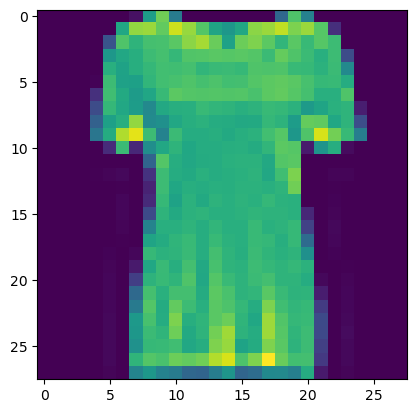

T-Shirt


In [128]:
from matplotlib import pyplot

#example
sample, label = train_dataset[10]
sample = torch.squeeze(sample)
pyplot.imshow(sample)
pyplot.show()
print(labels_names[label])

In [129]:
from torch.utils.data import DataLoader
batch_size = 64      
train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [130]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(NeuralNetwork,self).__init__()
        self.flaten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(in_features = input_size, out_features = hidden_layer_size),
            nn.ReLU(),
            nn.Linear(in_features = hidden_layer_size, out_features = output_size)
        )
        
    def forward(self,X):
        X = self.flaten(X)
        return self.model(X)

input_size = 784            # The image size = 28 x 28 = 784
hidden_layer_size = 64      # The number of nodes at the hidden layer
output_size = 10      # The number of output classes. In this case, from 0 to 9

model = NeuralNetwork(input_size, hidden_layer_size, output_size)

In [131]:
# function for training the data

def train(data, model, loss_function, optimizer):
    
    size = len(data.dataset)
    number_of_batches = len(data)
    sum_of_train_loss = 0
    batch = 0
    
    for X, y in data:
        
        # Calculamos la predicción del modelo y la correspondiente pérdida (error)
        prediction = model(X)
        loss = loss_function(prediction,y)
        
        # Backpropagamos usando el optimizador proveido.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_of_train_loss +=  loss.item()
        
        if batch % 100 == 0:
            current = batch*len(X)
            print(f"batch={batch} loss={loss:>7f}  muestras-procesadas:[{current:>5d}/{size:>5d}]")
        
        batch += 1
        
    average_train_loss = sum_of_train_loss / number_of_batches
    return average_train_loss

In [132]:
#function for testing the data

def test(data, model, loss_function):
    
    number_of_samples = len(data.dataset)
    number_of_batches = len(data)
    sum_of_test_loss = 0
    sum_of_hits = 0
    
    with torch.no_grad():
        for X, y in data:
            predictions = model(X)
                                
            loss = loss_function(predictions, y)
            sum_of_test_loss += loss.item()
            
            #hits
            sum_of_hits += (predictions.argmax(1) == y).type(torch.float).sum().item()
            
    # Calculamos la pérdida total y la fracción de clasificaciones correctas, y las imprimimos.
    
    average_test_loss = sum_of_test_loss / number_of_batches
    average_effectiveness = sum_of_hits / number_of_samples
    print(f"Test Error: \n Accuracy: {(100*average_effectiveness):>0.1f}% , Avg loss: {average_test_loss:>8f} \n")
    return average_test_loss

In [133]:
#Parameters

loss_function = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)  #stochastic gradient descend

learning_rate = 0.001                                                # The speed of convergence
number_of_epochs = 10
epochs = range(number_of_epochs)                            # The number of times entire dataset is trained

In [134]:
for epoch in epochs:
    print(f"Epoca {epoch+1}\n-------------------------------")
    average_test_loss = train(train_dataset, model, loss_function, optimizer)
    average_test_loss = test(test_dataset, model, loss_function)
    

Epoca 1
-------------------------------
batch=0 loss=2.279405  muestras-procesadas:[    0/60000]
batch=100 loss=2.227779  muestras-procesadas:[ 6400/60000]
batch=200 loss=2.180217  muestras-procesadas:[12800/60000]
batch=300 loss=2.152981  muestras-procesadas:[19200/60000]
batch=400 loss=2.130786  muestras-procesadas:[25600/60000]
batch=500 loss=2.065008  muestras-procesadas:[32000/60000]
batch=600 loss=2.038182  muestras-procesadas:[38400/60000]
batch=700 loss=2.006606  muestras-procesadas:[44800/60000]
batch=800 loss=1.888726  muestras-procesadas:[51200/60000]
batch=900 loss=1.892579  muestras-procesadas:[57600/60000]
Test Error: 
 Accuracy: 57.2% , Avg loss: 1.884632 

Epoca 2
-------------------------------
batch=0 loss=1.878883  muestras-procesadas:[    0/60000]
batch=100 loss=1.798075  muestras-procesadas:[ 6400/60000]
batch=200 loss=1.763328  muestras-procesadas:[12800/60000]
batch=300 loss=1.725658  muestras-procesadas:[19200/60000]
batch=400 loss=1.706701  muestras-procesadas: